In [0]:
#module import
#modules have been given their own cell to avoid having to re-define network or
#perform other operations after terminating runtime sessions


#tensorflow 2.0 modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, regularizers

#helper modules
import numpy as np
import matplotlib.pyplot as plt

#dataset module
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [0]:
#alternate tensorflow data loader and pipeline


ds_train = tfds.load(name='cifar10', split='train')
ds_test = tfds.load(name='cifar10', split='test')

#extend dataset, shuffle, and split into batches
ds_train = ds_train.repeat().shuffle(1024).batch(32)

In [0]:
#data augmentation and shuffling


ds_train_flip = tf.image.flip_left_right(ds_train)
ds_train = [ds_train, ds_train_flip]

#extend dataset, shuffle, and split into batches
ds_train = ds_train.repeat().shuffle(1024).batch(32)

In [3]:
#data loader and normalizer


#cifar = tf.keras.datasets.cifar10

(imtrain, labtrain), (imtest, labtest) = datasets.cifar10.load_data()
#normalize pixel values
imtrain, imtest = imtrain / 255.0, imtest / 255.0

#imtrain_flip = tf.image.flip_left_right(imtrain)
#imtrain = [imtrain, imtrain_flip]

#labels do not inherently map to names, so we pre-define them to match a label vector
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

#check to see if GPU is available
print(tf.config.list_physical_devices('GPU'))

170500096/170498071 [==============================] - 2s 0us/step
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
#network definition


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(50, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(50, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 50)        14450     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 50)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 50)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 50)          2

In [8]:
#compile and train model

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(imtrain, labtrain, epochs=30, batch_size=128, validation_data=(imtest, labtest))

Epoch 1/30
391/391 [==============================] - 2s 6ms/step - loss: 0.8555 - accuracy: 0.7336 - val_loss: 0.9332 - val_accuracy: 0.7125
Epoch 2/30
391/391 [==============================] - 2s 6ms/step - loss: 0.8337 - accuracy: 0.7420 - val_loss: 0.9101 - val_accuracy: 0.7258
Epoch 3/30
391/391 [==============================] - 2s 6ms/step - loss: 0.8251 - accuracy: 0.7428 - val_loss: 0.8706 - val_accuracy: 0.7349
Epoch 4/30
391/391 [==============================] - 2s 6ms/step - loss: 0.8203 - accuracy: 0.7427 - val_loss: 0.8796 - val_accuracy: 0.7271
Epoch 5/30
391/391 [==============================] - 2s 6ms/step - loss: 0.8164 - accuracy: 0.7452 - val_loss: 0.9423 - val_accuracy: 0.7098
Epoch 6/30
391/391 [==============================] - 2s 6ms/step - loss: 0.8222 - accuracy: 0.7434 - val_loss: 0.9088 - val_accuracy: 0.7162
Epoch 7/30
391/391 [==============================] - 2s 6ms/step - loss: 0.8132 - accuracy: 0.7461 - val_loss: 0.9230 - val_accuracy: 0.7138
Epoch 

313/313 - 1s - loss: 0.8886 - accuracy: 0.7272


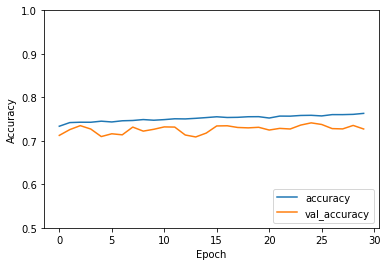

In [9]:
#performance evaluation cell

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(imtest,  labtest, verbose=2)